In [2]:
# loading traditional packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import os
from sklearn.utils import resample

from tqdm import tqdm # progress bar

In [1]:
# OLS regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

# prediction metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# packages for statistical analysis
import statsmodels.formula.api as smFrmApi
import statsmodels.stats as statsmodels
import statsmodels.tsa.api as smt

from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import reset_ramsey

## Data import

In [3]:
#Importing the original data
df0 = pd.read_csv('original_data_new factors.csv')
df0=df0.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1)

In [4]:
df0

,store,latitude,longitude,rental_area,annual_rental_cost_of_sq_m,shopping center,floor,target_audience,relative_interest_target audience,parking_500_m,...,presence_on_market,annual_sales_per_sq_m,nearest_sportmaster,address,geometry,hex_id,json_encoded,competition_rate,nearest_store,nearest_competitor
0,Академическая,60.012253,30.394577,172,13200,0,1,22369,0.0196,1,...,28,387147,700,"г. Санкт-Петербург, пр. Науки, д.19, к.2",POINT (60.012253 30.394577),874356c0dffffff,"[[[60.00351814810478, 30.370675260428786], [59...",2,2500,600
1,Балтийская,59.907526,30.307446,117,9600,0,1,14369,0.0184,1,...,16,199322,3000,"г. Санкт-Петербург, набережная Обводного канал...",POINT (59.907526 30.307446),874356c14ffffff,"[[[59.89169252417279, 30.292574150305384], [59...",1,6000,150
2,Богатырский,60.000098,30.272053,183,15079,0,1,30176,0.0175,1,...,68,257479,2000,"г. Санкт-Петербург, Богатырский пр., д.13А (пр...",POINT (60.000098 30.272053),874356ca9ffffff,"[[[60.00121571373717, 30.256862722581104], [59...",1,2000,1000
3,Звездная,59.832191,30.347180,423,15915,1,1,9723,0.0190,1,...,108,209175,2500,"г. Санкт-Петербург, ул. Звёздная, д. 1, ТРК «К...",POINT (59.832191 30.34718),874356da9ffffff,"[[[59.81887292491314, 30.32884659781999], [59....",1,400,700
4,Звездная - 2,59.832072,30.343203,395,9418,0,1,9723,0.0190,1,...,9,99026,2500,"г. Санкт-Петербург, Московское шоссе д.36",POINT (59.832072 30.343203),874356da9ffffff,"[[[59.81887292491314, 30.32884659781999], [59....",1,400,400
5,Купчино,59.825075,30.381646,194,18576,1,2,11904,0.0179,1,...,72,194142,450,"г. Санкт-Петербург, Балканская пл., д. 5",POINT (59.825075 30.381646),874356d18ffffff,"[[[59.81959993897643, 30.366600134861145], [59...",1,3000,200
6,Лахта,59.993618,30.146566,70,16457,0,1,54,0.0812,1,...,8,99026,5000,"г. Санкт-Петербург, Лахтинский пр-т, д. 85, ТВ...",POINT (59.993618 30.146566),874356c9effffff,"[[[59.98004188774697, 30.123968460375874], [59...",2,4000,70
7,МаксиСопот,59.949113,30.234835,320,10786,1,3,11534,0.0211,1,...,32,78220,1500,"г. Санкт-Петербург, ул. Железноводская, д. 68,...",POINT (59.949113 30.234835),874356c85ffffff,"[[[59.94490577501892, 30.1990476988962], [59.9...",0,3000,4000
8,Меркурий,59.990872,30.205904,842,18018,1,2,16880,0.0225,1,...,110,179249,10,"г. Санкт-Петербург, ул. Савушкина, д. 141",POINT (59.990872 30.205904),874356c81ffffff,"[[[59.981655559033385, 30.199686202029827], [5...",1,4000,1500
9,Мурино,60.049242,30.443940,72,18333,1,1,12567,0.0190,1,...,33,417117,6000,"г. Мурино, Тихая ул., д. 12",POINT (60.049242 30.44394),874356c73ffffff,"[[[60.04104003930052, 30.40950217649522], [60....",0,6000,4000


## Data preprocessing 


In [6]:
df1 = df0[['rental_area',
           'annual_rental_cost_of_sq_m','shopping center','floor',
          'target_audience','nearest_metro','nearest_hypermarket','presence_on_market','nearest_sportmaster',
          'competition_rate','nearest_store','nearest_competitor' ,'annual_sales_per_sq_m']]
df1

,rental_area,annual_rental_cost_of_sq_m,shopping center,floor,target_audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,nearest_store,nearest_competitor,annual_sales_per_sq_m
0,172,13200,0,1,22369,177,400,28,700,2,2500,600,387147
1,117,9600,0,1,14369,430,400,16,3000,1,6000,150,199322
2,183,15079,0,1,30176,1440,0,68,2000,1,2000,1000,257479
3,423,15915,1,1,9723,440,0,108,2500,1,400,700,209175
4,395,9418,0,1,9723,440,0,9,2500,1,400,400,99026
5,194,18576,1,2,11904,590,700,72,450,1,3000,200,194142
6,70,16457,0,1,54,3600,5000,8,5000,2,4000,70,99026
7,320,10786,1,3,11534,100,1650,32,1500,0,3000,4000,78220
8,842,18018,1,2,16880,610,100,110,10,1,4000,1500,179249
9,72,18333,1,1,12567,91,2770,33,6000,0,6000,4000,417117


In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaled = scaler.fit_transform(df1[['rental_area',
           'annual_rental_cost_of_sq_m','floor',
          'target_audience','nearest_metro','nearest_hypermarket','presence_on_market','nearest_sportmaster',
          'competition_rate','nearest_store','nearest_competitor']])

In [9]:
scaled_df = pd.DataFrame(scaled, columns = ['rental_area',
           'annual_rental_cost_of_sq_m','floor',
          'target_audience','nearest_metro','nearest_hypermarket','presence_on_market','nearest_sportmaster',
          'competition_rate', 'nearest_store','nearest_competitor'])

In [10]:
scaled_df

,rental_area,annual_rental_cost_of_sq_m,floor,target_audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,nearest_store,nearest_competitor
0,-0.614169,-0.186480,-0.534522,1.226556,-0.724201,-0.527174,-0.556738,-0.969600,1.692456,-0.448303,-0.595139
1,-0.849975,-1.218631,-0.534522,0.084888,-0.486352,-0.527174,-0.809641,0.384700,0.130189,1.576293,-0.919106
2,-0.567008,0.352245,-0.534522,2.340682,0.463163,-0.803120,0.286272,-0.204126,0.130189,-0.737531,-0.307169
3,0.461966,0.591934,-0.534522,-0.578136,-0.476951,-0.803120,1.129282,0.090287,0.130189,-1.663061,-0.523147
4,0.341919,-1.270812,-0.534522,-0.578136,-0.476951,-0.803120,-0.957168,0.090287,0.130189,-1.663061,-0.739125
5,-0.519846,1.354865,1.069045,-0.266889,-0.335934,-0.320213,0.370573,-1.116806,0.130189,-0.159075,-0.883110
6,-1.051483,0.747330,-0.534522,-1.957985,2.493808,2.646216,-0.978243,1.562351,1.692456,0.419381,-0.976700
7,0.020365,-0.878594,2.672612,-0.319691,-0.796590,0.335160,-0.472437,-0.498539,-1.432078,-0.159075,1.852611
8,2.258384,1.194882,1.069045,0.443229,-0.317132,-0.734134,1.171433,-1.375890,0.130189,0.419381,0.052795
9,-1.042908,1.285195,-0.534522,-0.172273,-0.805051,1.107812,-0.451362,2.151177,-1.432078,1.576293,1.852611


In [11]:
scaled_df['annual_sales_per_sq_m'] = df1['annual_sales_per_sq_m']
scaled_df['shopping center'] = df1['shopping center']

In [16]:
scaled_df.to_csv("scaled_df_new_factors.csv")

## EDA

In [59]:
df1.describe()

,rental_area,annual_rental_cost_of_sq_m,shopping center,floor,target_audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,annual_sales_per_sq_m
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,315.250000,13850.416667,0.416667,1.333333,13774.166667,947.333333,1164.166667,54.416667,2346.666667,0.916667,196299.666667
std,243.613377,3642.953933,0.514929,0.651339,7318.874663,1110.999741,1514.010078,49.558888,1773.811168,0.668558,111890.229280
min,70.000000,9306.000000,0.000000,1.000000,54.000000,91.000000,0.000000,8.000000,10.000000,0.000000,78220.000000
25%,158.250000,10489.500000,0.000000,1.000000,11081.250000,366.750000,75.000000,14.250000,1300.000000,0.750000,99026.000000
50%,246.000000,14139.500000,0.000000,1.000000,12235.500000,515.000000,550.000000,32.500000,2250.000000,1.000000,186695.500000
75%,402.000000,16847.250000,1.000000,1.250000,15038.000000,900.000000,1775.000000,81.000000,3000.000000,1.000000,221251.000000
max,842.000000,18576.000000,1.000000,3.000000,30176.000000,3600.000000,5000.000000,160.000000,6000.000000,2.000000,417117.000000


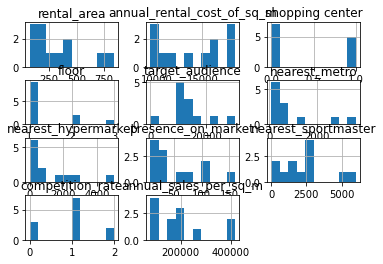

In [62]:
df1.hist();

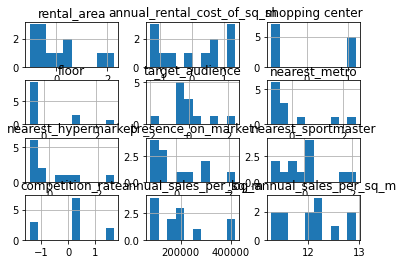

In [64]:
scaled_df.hist();

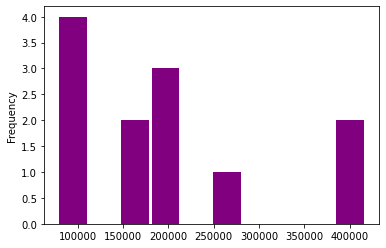

In [12]:
#Distribution of the target variable (non-logged)
df0['annual_sales_per_sq_m'].plot.hist(grid=False, rwidth=0.9, color='purple');

In [13]:
df1.corr(method = "spearman").style.background_gradient(cmap='RdBu_r')

,rental_area,annual_rental_cost_of_sq_m,shopping center,floor,target_audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,nearest_store,nearest_competitor,annual_sales_per_sq_m
rental_area,1.000000,-0.279720,0.269309,0.349855,0.038529,0.108582,-0.469154,0.602453,-0.442888,-0.185278,-0.354300,0.347371,-0.340353
annual_rental_cost_of_sq_m,-0.279720,1.000000,0.612066,0.294615,0.000000,0.021016,0.165791,0.199650,-0.200354,0.051247,0.103785,-0.035088,0.407020
shopping center,0.269309,0.612066,1.000000,0.676891,-0.147153,-0.441460,0.024700,0.515037,-0.270733,-0.414039,0.000000,0.393099,0.147412
floor,0.349855,0.294615,0.676891,1.000000,-0.009223,-0.189069,0.060374,0.322800,-0.638622,-0.269880,-0.014135,0.247145,-0.323368
target_audience,0.038529,0.000000,-0.147153,-0.009223,1.000000,-0.066667,-0.279159,0.461404,-0.320425,0.102674,0.146987,0.210897,0.543059
nearest_metro,0.108582,0.021016,-0.441460,-0.189069,-0.066667,1.000000,0.067139,-0.068421,-0.052817,0.288276,-0.010755,-0.260106,-0.405976
nearest_hypermarket,-0.469154,0.165791,0.024700,0.060374,-0.279159,0.067139,1.000000,-0.321563,0.335108,-0.256516,0.676966,0.215932,-0.297349
presence_on_market,0.602453,0.199650,0.515037,0.322800,0.461404,-0.068421,-0.321563,1.000000,-0.253523,-0.090827,-0.071701,0.351494,0.337435
nearest_sportmaster,-0.442888,-0.200354,-0.270733,-0.638622,-0.320425,-0.052817,0.335108,-0.253523,1.000000,-0.023778,0.356173,-0.105820,0.135803
competition_rate,-0.185278,0.051247,-0.414039,-0.269880,0.102674,0.288276,-0.256516,-0.090827,-0.023778,1.000000,-0.260248,-0.783276,0.231422


## Building a model with 3 factors and logged target variable.

In [14]:
scaled_df['log_annual_sales_per_sq_m'] = scaled_df['annual_sales_per_sq_m'].apply(lambda x: math.log(x) )
scaled_df

,rental_area,annual_rental_cost_of_sq_m,floor,target_audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,nearest_store,nearest_competitor,annual_sales_per_sq_m,shopping center,log_annual_sales_per_sq_m
0,-0.614169,-0.186480,-0.534522,1.226556,-0.724201,-0.527174,-0.556738,-0.969600,1.692456,-0.448303,-0.595139,387147,0,12.866560
1,-0.849975,-1.218631,-0.534522,0.084888,-0.486352,-0.527174,-0.809641,0.384700,0.130189,1.576293,-0.919106,199322,0,12.202677
2,-0.567008,0.352245,-0.534522,2.340682,0.463163,-0.803120,0.286272,-0.204126,0.130189,-0.737531,-0.307169,257479,0,12.458693
3,0.461966,0.591934,-0.534522,-0.578136,-0.476951,-0.803120,1.129282,0.090287,0.130189,-1.663061,-0.523147,209175,1,12.250927
4,0.341919,-1.270812,-0.534522,-0.578136,-0.476951,-0.803120,-0.957168,0.090287,0.130189,-1.663061,-0.739125,99026,0,11.503138
5,-0.519846,1.354865,1.069045,-0.266889,-0.335934,-0.320213,0.370573,-1.116806,0.130189,-0.159075,-0.883110,194142,1,12.176345
6,-1.051483,0.747330,-0.534522,-1.957985,2.493808,2.646216,-0.978243,1.562351,1.692456,0.419381,-0.976700,99026,0,11.503138
7,0.020365,-0.878594,2.672612,-0.319691,-0.796590,0.335160,-0.472437,-0.498539,-1.432078,-0.159075,1.852611,78220,1,11.267281
8,2.258384,1.194882,1.069045,0.443229,-0.317132,-0.734134,1.171433,-1.375890,0.130189,0.419381,0.052795,179249,1,12.096531
9,-1.042908,1.285195,-0.534522,-0.172273,-0.805051,1.107812,-0.451362,2.151177,-1.432078,1.576293,1.852611,417117,1,12.941122


### Model without bootstrapping

In [15]:
model1 = smFrmApi.ols('log_annual_sales_per_sq_m ~ annual_rental_cost_of_sq_m + nearest_metro + floor', scaled_df).fit()
model1.summary()

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     log_annual_sales_per_sq_m   R-squared:                       0.800
Model:                                   OLS   Adj. R-squared:                  0.725
Method:                        Least Squares   F-statistic:                     10.68
Date:                       Thu, 01 Jun 2023   Prob (F-statistic):            0.00359
Time:                               16:41:51   Log-Likelihood:              -0.038123
No. Observations:                         12   AIC:                             8.076
Df Residuals:                              8   BIC:                             10.02
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     12.0417      0.086    140.311      0.000      11.844      12.240
annual_rental_cost_of_sq_m     0.3113      0.087      3.578      0.007       0.111       0.512
nearest_metro                 -0.3870      0.091     -4.266      0.003      -0.596      -0.178
floor                         -0.3308      0.091     -3.641      0.007      -0.540      -0.121
==============================================================================
Omnibus:                        0.807   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.211
Skew:                          -0.321   Prob(JB):                        0.900
Kurtosis:                       2.899   Cond. No.                         1.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Here we test if the model's residuals are normally distributed. 
#p-value should be higher than 0.05 in order not to reject the H0 of the normal distribution. 
stats.jarque_bera(model1.resid)

Jarque_beraResult(statistic=0.21083625559594327, pvalue=0.8999481505674619)

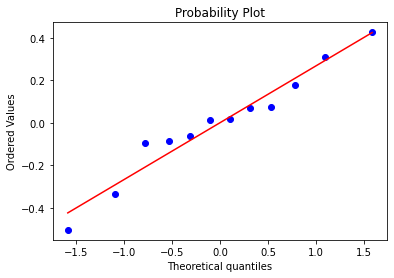

In [17]:
#Looking at the q-q plots to confirm the normality of disturbances.
stats.probplot(model1.resid, dist="norm", plot=plt)
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


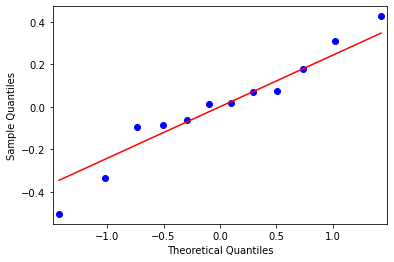

In [18]:
qqplot(model1.resid, line='s');

In [19]:
#Here we test if the model (non-bootstrapped) requires any nonlinear transformations. The null hypothesis is that the current model is
#adequately specified. The test p-value confirms it. 
reset_ramsey(model1, degree=3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.07729072]]), p=0.926527219022966, df_denom=6, df_num=2>

In [20]:
#CHECKING FOR MULTICOLLINEARITY. None is detected.

In [21]:
dfXX = scaled_df.drop(['annual_sales_per_sq_m','rental_area','shopping center','target_audience','nearest_hypermarket',
                        'presence_on_market','nearest_sportmaster','competition_rate','log_annual_sales_per_sq_m','nearest_store','nearest_competitor'], axis=1)

dfVIFs = pd.DataFrame()
dfVIFs['regressor'] = dfXX.columns
dfVIFs['VIF'] = np.linalg.inv(dfXX.corr().to_numpy()).diagonal().round(2)
dfVIFs

,regressor,VIF
0,annual_rental_cost_of_sq_m,1.03
1,floor,1.12
2,nearest_metro,1.12


## Model with bootstrapping
FYI since the resampling is randomized it is not possible to receive the same median coefficients as we received in the text, yet the difference is not significant. 

### Running bootstrapping procedure and calculating Confidence intervals for the median values of the bootstrapped coefficients.

In [22]:
#Implementing boostrapping
from scipy.stats import bootstrap

In [26]:
# resample with replacement each row
boot_slope_rental_cost = []
boot_slope_metro = []
boot_slope_floor = []
boot_slope_store = []
boot_interc = []
n_boots = 1000
n_points = 12
for _ in range(n_boots):
 # sample the rows, same size, with replacement
 sample_df = scaled_df.sample(n=n_points, replace=True)
 # fit a linear regression
 ols_model_temp = smFrmApi.ols(formula = 'log_annual_sales_per_sq_m ~ annual_rental_cost_of_sq_m + floor + nearest_metro', data=sample_df)
 results_temp = ols_model_temp.fit()
 
 # append coefficients
 boot_interc.append(results_temp.params[0]) 
 boot_slope_rental_cost.append(results_temp.params[1])
 boot_slope_floor.append(results_temp.params[2])
 boot_slope_metro.append(results_temp.params[3])
 

In [27]:
boot_slope_metro

[-0.3584033780345486,
 -0.7831930688792834,
 -0.4368876489570801,
 -0.40550280921787496,
 -0.44870792320971464,
 -0.3304025527835801,
 -0.3344037666820281,
 -0.39253831960252583,
 -0.3894947257067476,
 -0.40875354590408364,
 -0.46125879507635403,
 -0.4470847152151687,
 -0.24548561483591214,
 -0.3843366508238679,
 -0.4690215845643635,
 -0.47212396618828567,
 -0.3477410725413328,
 -0.31556467935758103,
 -0.34329708549157023,
 -0.36642887999879203,
 0.5360023349122911,
 -0.4586804985696351,
 -0.3757881371230738,
 -0.15612062073360677,
 -0.43505152833744765,
 -0.35603072718983064,
 -0.40403851019320025,
 -0.3969816234420198,
 -0.3004150140789892,
 -0.3735263345661841,
 -0.5064289870714689,
 -0.29850891892036624,
 -0.34951720446121637,
 -0.3099459908851785,
 -0.3432563301982394,
 -0.342168610998432,
 -0.43878402787557697,
 -0.23526973165295528,
 -0.41149109520304217,
 -0.5612886818057743,
 -0.5444572525317275,
 -0.09908714515961825,
 -0.40745255253434776,
 -0.42592854818152714,
 -0.27963834

In [28]:
 results_temp.params

Intercept                     11.150941
annual_rental_cost_of_sq_m     0.140407
floor                          0.099699
nearest_metro                 -2.116589
dtype: float64

In [29]:
boot_slope_rental_cost = (boot_slope_rental_cost,)
boot_interc = ( boot_interc,)
boot_slope_floor = (boot_slope_floor,)
boot_slope_metro = (boot_slope_metro,)

In [30]:
interc_ci = bootstrap(boot_interc, np.median, confidence_level=0.95,
                         random_state=1, method='BCa')
rental_cost_ci = bootstrap(boot_slope_rental_cost, np.median, confidence_level=0.95,
                         random_state=1, method='BCa')
metro_ci = bootstrap(boot_slope_metro, np.median, confidence_level=0.95,
                         random_state=1, method='BCa')
floor_ci = bootstrap(boot_slope_floor, np.median, confidence_level=0.95,
                         random_state=1, method='BCa')

In [31]:
#None of the coefficients or intercept CI go through zero.

In [31]:
print("Confidence intervals for the bootstrapped regression coefficients\n", "Intercept: ", interc_ci, "\n\n",
     "Annual rental cost: ",rental_cost_ci, "\n\n", "Nearest Metro: ",  metro_ci, "\n\n", "Floor: ", floor_ci )

Confidence intervals for the bootstrapped regression coefficients
 Intercept:  BootstrapResult(confidence_interval=ConfidenceInterval(low=12.030227383088683, high=12.044781600477474), standard_error=0.0038616629683859535) 

 Annual rental cost:  BootstrapResult(confidence_interval=ConfidenceInterval(low=0.3093575676105775, high=0.3231267945559462), standard_error=0.0032895301442918165) 

 Nearest Metro:  BootstrapResult(confidence_interval=ConfidenceInterval(low=-0.39718853777819896, high=-0.3873358301212184), standard_error=0.002779092309758476) 

 Floor:  BootstrapResult(confidence_interval=ConfidenceInterval(low=-0.3484399754274928, high=-0.33789789852732355), standard_error=0.002860477383607948)


In [32]:
mean_intercept = np.mean ( boot_interc)
mean_slope_rental_cost = np.mean(boot_slope_rental_cost)
mean_slope_metro = np.mean(boot_slope_metro)
mean_slope_floor = np.mean(boot_slope_floor)

median_intercept = np.median ( boot_interc)
median_slope_rental_cost = np.median(boot_slope_rental_cost)
median_slope_metro = np.median(boot_slope_metro)
median_slope_floor = np.median(boot_slope_floor)
median_slope_store = np.median(boot_slope_store)

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [33]:
print(" Median for bootrstrapped intercept: ",median_intercept, "\n Median for bootstrapped rental_cost: ", median_slope_rental_cost, "\n Median for bootstrapped metro: ", 
                                                     median_slope_metro, "\n Median for bootstrapped floor: ",
    median_slope_floor )

 Median for bootrstrapped intercept:  12.037632162281104 
 Median for bootstrapped rental_cost:  0.31459122069333484 
 Median for bootstrapped metro:  -0.39313015159854237 
 Median for bootstrapped floor:  -0.3427780809259453


In [34]:
print(" Mean for bootrstrapped intercept: ",mean_intercept, "\n Mean for bootstrapped rental_cost: ", mean_slope_rental_cost, "\n Mean for bootstrapped metro: ", 
                                                     mean_slope_metro, "\n Mean for bootstrapped floor: ",
    mean_slope_floor )

 Mean for bootrstrapped intercept:  11.970362903553546 
 Mean for bootstrapped rental_cost:  0.32510365416859605 
 Mean for bootstrapped metro:  -0.39659246093303924 
 Mean for bootstrapped floor:  -0.47986658814121924


## Checking the model on the train data to calculate errors 

In [35]:
df_model_check = scaled_df.copy()

In [36]:
df_model_check['median_log_annual_sales_model'] = median_intercept + median_slope_rental_cost*df_model_check['annual_rental_cost_of_sq_m']+median_slope_metro*df_model_check['nearest_metro'] +median_slope_floor*df_model_check['floor']
df_model_check['mean_log_annual_sales_model'] = mean_intercept + mean_slope_rental_cost*df_model_check['annual_rental_cost_of_sq_m']+mean_slope_metro*df_model_check['nearest_metro'] +mean_slope_floor*df_model_check['floor']


In [37]:
df_model_check['median_exp_annual_sales_model'] = np.exp(df_model_check['median_log_annual_sales_model'])
df_model_check['mean_exp_annual_sales_model'] = np.exp(df_model_check['mean_log_annual_sales_model'])
df_model_check['median_error'] = df_model_check['median_exp_annual_sales_model'] - df_model_check['annual_sales_per_sq_m']
df_model_check['mean_error'] = df_model_check['mean_exp_annual_sales_model'] - df_model_check['annual_sales_per_sq_m']

In [38]:
df_model_check

,rental_area,annual_rental_cost_of_sq_m,floor,target_audience,nearest_metro,nearest_hypermarket,presence_on_market,nearest_sportmaster,competition_rate,nearest_store,nearest_competitor,annual_sales_per_sq_m,shopping center,log_annual_sales_per_sq_m,median_log_annual_sales_model,mean_log_annual_sales_model,median_exp_annual_sales_model,mean_exp_annual_sales_model,median_error,mean_error
0,-0.614169,-0.186480,-0.534522,1.226556,-0.724201,-0.527174,-0.556738,-0.969600,1.692456,-0.448303,-0.595139,387147,0,12.866560,12.446895,12.453450,254458.989728,256132.365033,-132688.010272,-131014.634967
1,-0.849975,-1.218631,-0.534522,0.084888,-0.486352,-0.527174,-0.809641,0.384700,0.130189,1.576293,-0.919106,199322,0,12.202677,12.028684,12.023565,167490.834800,166635.599645,-31831.165200,-32686.400355
2,-0.567008,0.352245,-0.534522,2.340682,0.463163,-0.803120,0.286272,-0.204126,0.130189,-0.737531,-0.307169,257479,0,12.458693,12.149585,12.157692,189015.602732,190554.175427,-68463.397268,-66924.824573
3,0.461966,0.591934,-0.534522,-0.578136,-0.476951,-0.803120,1.129282,0.090287,0.130189,-1.663061,-0.523147,209175,1,12.250927,12.594576,12.608457,294954.291297,299077.292978,85779.291297,89902.292978
4,0.341919,-1.270812,-0.534522,-0.578136,-0.476951,-0.803120,-0.957168,0.090287,0.130189,-1.663061,-0.739125,99026,0,11.503138,12.008572,12.002872,164155.983254,163222.900255,65129.983254,64196.900255
5,-0.519846,1.354865,1.069045,-0.266889,-0.335934,-0.320213,0.370573,-1.116806,0.130189,-0.159075,-0.883110,194142,1,12.176345,12.229481,12.031064,204736.971605,167890.014246,10594.971605,-26251.985754
6,-1.051483,0.747330,-0.534522,-1.957985,2.493808,2.646216,-0.978243,1.562351,1.692456,0.419381,-0.976700,99026,0,11.503138,11.475567,11.480797,96333.076178,96838.174328,-2692.923822,-2187.825672
7,0.020365,-0.878594,2.672612,-0.319691,-0.796590,0.335160,-0.472437,-0.498539,-1.432078,-0.159075,1.852611,78220,1,11.267281,11.158285,10.718153,70142.523964,45168.385113,-8077.476036,-33051.614887
8,2.258384,1.194882,1.069045,0.443229,-0.317132,-0.734134,1.171433,-1.375890,0.130189,0.419381,0.052795,179249,1,12.096531,12.171760,11.971596,193253.923737,158196.997417,14004.923737,-21052.002583
9,-1.042908,1.285195,-0.534522,-0.172273,-0.805051,1.107812,-0.451362,2.151177,-1.432078,1.576293,1.852611,417117,1,12.941122,12.941655,12.963961,417339.545499,426753.105328,222.545499,9636.105328


In [47]:
df_model_check.to_excel("model_check2.xlsx")

In [39]:
print(" Sum of median error: ", sum(np.abs(df_model_check['median_error'])),"\n", "Sum of mean error: ", sum(np.abs(df_model_check['mean_error'])))

 Sum of median error:  437303.95936733263 
 Sum of mean error:  495159.5671207927


In [40]:
print("Total sum of original annual sales: ", sum(df_model_check['annual_sales_per_sq_m']))

Total sum of original annual sales:  2355596


In [41]:
print("Percentage of median error:", sum(np.abs(df_model_check['median_error']))/sum(df_model_check['annual_sales_per_sq_m'])*100)

Percentage of median error: 18.564471979377306


## Predicting annual sales per 1 sq.m. for the new 12 locations in SPb

In [42]:
test_df = pd.read_csv("new_locations_stand.csv")
test_df

,annual_rental_cost_of_sq_m,floor,nearest_metro
0,2.909685,-0.534522,-0.805991
1,1.877821,-0.534522,-0.279527
2,3.932661,-0.534522,-0.726081
3,0.074998,1.069045,-0.805991
4,4.630223,-0.534522,-0.232521
5,6.350474,-0.534522,-0.655573
6,6.350474,-0.534522,0.002507
7,2.909972,1.069045,0.049513
8,-0.530530,-0.534522,0.519569
9,2.221872,-0.534522,-0.724201


In [43]:
test_df['median_annual_sales_per_sq_m'] = median_intercept + median_slope_rental_cost*test_df['annual_rental_cost_of_sq_m']+median_slope_metro*test_df['nearest_metro'] +median_slope_floor*test_df['floor']
test_df['mean_annual_sales_per_sq_m'] = mean_intercept + mean_slope_rental_cost*test_df['annual_rental_cost_of_sq_m']+mean_slope_metro*test_df['nearest_metro'] +mean_slope_floor*test_df['floor']
                               

In [44]:
test_df

,annual_rental_cost_of_sq_m,floor,nearest_metro,median_annual_sales_per_sq_m,mean_annual_sales_per_sq_m
0,2.909685,-0.534522,-0.805991,13.453075,13.492462
1,1.877821,-0.534522,-0.279527,12.921491,12.948207
2,3.932661,-0.534522,-0.726081,13.743480,13.793343
3,0.074998,1.069045,-0.805991,12.011640,11.801396
4,4.630223,-0.534522,-0.232521,13.768893,13.824381
5,6.350474,-0.534522,-0.655573,14.476384,14.551420
6,6.350474,-0.534522,0.002507,14.217673,14.290431
7,2.909972,1.069045,0.049513,12.567174,12.383770
8,-0.530530,-0.534522,0.519569,11.849696,11.848328
9,2.221872,-0.534522,-0.724201,13.204541,13.236414


In [45]:
test_df['median_exp_annual_sales'] = np.exp(test_df['median_annual_sales_per_sq_m'])
test_df['mean_exp_annual_sales'] = np.exp(test_df['mean_annual_sales_per_sq_m'])
test_df

,annual_rental_cost_of_sq_m,floor,nearest_metro,median_annual_sales_per_sq_m,mean_annual_sales_per_sq_m,median_exp_annual_sales,mean_exp_annual_sales
0,2.909685,-0.534522,-0.805991,13.453075,13.492462,6.959795e+05,7.239384e+05
1,1.877821,-0.534522,-0.279527,12.921491,12.948207,4.090086e+05,4.200829e+05
2,3.932661,-0.534522,-0.726081,13.743480,13.793343,9.305023e+05,9.780766e+05
3,0.074998,1.069045,-0.805991,12.011640,11.801396,1.646603e+05,1.334385e+05
4,4.630223,-0.534522,-0.232521,13.768893,13.824381,9.544528e+05,1.008910e+06
5,6.350474,-0.534522,-0.655573,14.476384,14.551420,1.936482e+06,2.087379e+06
6,6.350474,-0.534522,0.002507,14.217673,14.290431,1.495054e+06,1.607886e+06
7,2.909972,1.069045,0.049513,12.567174,12.383770,2.869817e+05,2.388928e+05
8,-0.530530,-0.534522,0.519569,11.849696,11.848328,1.400418e+05,1.398503e+05
9,2.221872,-0.534522,-0.724201,13.204541,13.236414,5.428244e+05,5.604042e+05


In [52]:
#Saving the predictions to an excel file.
test_df.to_excel("new_location_prediction2.xlsx")

### Comparing results between models with and without bootstrapping

In [47]:
#Looking at the predictions of the model w/o bootstrapping.
model1.predict(test_df)

0     13.436235
1     12.911282
2     13.723763
3     12.023343
4     13.749914
5     14.449142
6     14.194475
7     12.574803
8     11.852323
9     13.190467
10    12.121543
11    12.835324
dtype: float64

In [49]:
#Looking at the difference between the model with and w/o bootstrapping (in rubles).
np.exp(model1.predict(test_df)) -  np.exp(test_df['median_annual_sales_per_sq_m'])

0    -11622.588102
1     -4154.617871
2    -18166.630749
3      1938.373005
4    -17944.590704
5    -52039.891261
6    -34282.637166
7      2197.714276
8       368.338791
9     -7586.351785
10     -303.079047
11    -3824.286567
dtype: float64

In [50]:
print(sum(np.exp(model1.predict(test_df)) -  np.exp(test_df['median_annual_sales_per_sq_m'])))

-145420.24718041765


### Looking at the distributions of the newly predicted target variable.

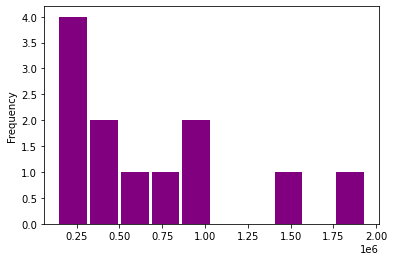

In [51]:
test_df['median_exp_annual_sales'].plot.hist(grid=False, rwidth=0.9, color='purple');

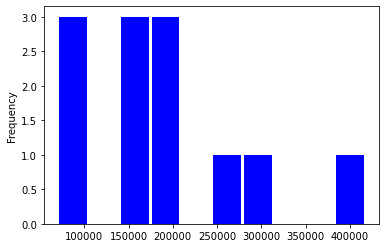

In [52]:
df_model_check['median_exp_annual_sales_model'].plot.hist(grid=False, rwidth =0.9, color = "blue" );

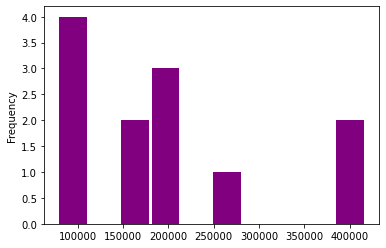

In [53]:
df0['annual_sales_per_sq_m'].plot.hist(grid=False, rwidth=0.9, color='purple');

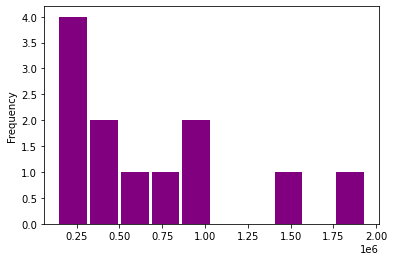

In [54]:
test_df['median_exp_annual_sales'].plot.hist(grid=False, rwidth=0.9, color='purple');

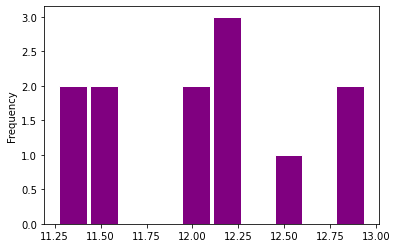

In [55]:
scaled_df['log_annual_sales_per_sq_m'].plot.hist(grid=False, rwidth=0.9, color='purple', edgecolor="white");